# From Pixels to Art: Mastering Edges and Filters in CV


## Edge Detection Techniques 🕵️‍♂️

### 1. Sobel Operator
Popular edge detection algorithm used in computer vision and image processing. It calculates the gradient of an image to highlight edges. Here's a Python code block using OpenCV to demonstrate edge detection using the Sobel Operator:

In [ ]:
# Step 1: Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Load an image
image_url = "/dog_bike_car.jpg"  # Replace with the URL of your image
image = cv2.imread(image_url, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale

In [ ]:
# Step 3: Apply the Sobel Operator for edge detection
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Sobel edge detection in the x-direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Sobel edge detection in the y-direction

In [ ]:
# Step 4: Combine the x and y gradients to get the magnitude
edge_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

In [ ]:
# Step 5: Normalize the edge magnitude
edge_magnitude_normalized = cv2.normalize(edge_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

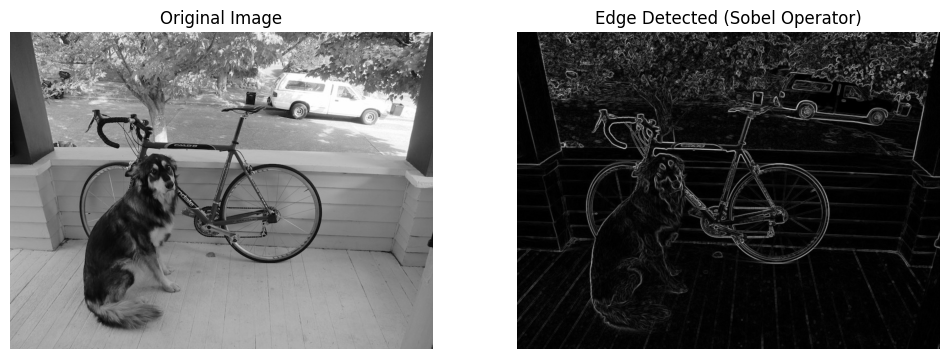

In [ ]:
# Step 6: Display the original image and the edge-detected image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edge_magnitude_normalized, cmap='gray')
plt.title('Edge Detected (Sobel Operator)')
plt.axis('off')

plt.show()

## How does Sobel Operator work ?


In [ ]:
# Load an image
image = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 255, 0, 0, 0, 0, 0],
    [0, 0, 0, 255, 255, 255, 0, 0, 0, 0],
    [0, 0, 255, 255, 255, 255, 255, 0, 0, 0],
    [0, 255, 255, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 0, 255, 255, 255, 0, 0, 0, 0],
    [0, 0, 0, 0, 255, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]


In [ ]:
# Define Sobel kernels for horizontal and vertical edge detection
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

In [ ]:
# Function to perform convolution
def convolve(image, kernel):
    # Get the dimensions of the input image and the convolution kernel
    image_height, image_width = len(image), len(image[0])
    kernel_height, kernel_width = kernel.shape

    # Create an empty output image (result of convolution)
    # The dimensions are adjusted based on the kernel size
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1
    output = np.zeros((output_height, output_width))

    # Iterate over the rows of the output image
    for i in range(output_height):
        # Iterate over the columns of the output image
        for j in range(output_width):
            # Initialize a variable to store the sum of products
            sum_of_products = 0

            # Iterate over the rows of the kernel
            for m in range(kernel_height):
                # Iterate over the columns of the kernel
                for n in range(kernel_width):
                    # Multiply the corresponding pixel in the image and kernel
                    # and add it to the sum_of_products
                    sum_of_products += image[i + m][j + n] * kernel[m, n]

            # Assign the sum_of_products to the corresponding pixel in the output image
            output[i, j] = sum_of_products

    # Return the result of the convolution
    return output

# Apply Sobel operator to calculate gradients
gradient_x = convolve(image, sobel_x)
gradient_y = convolve(image, sobel_y)

print("Gx", gradient_x)
print("Gy", gradient_y)

Gx [[   0.    0.  255.    0. -255.    0.    0.    0.]
 [   0.  255.  765.    0. -765. -255.    0.    0.]
 [ 255.  765.  765.    0. -765. -765. -255.    0.]
 [ 765.  765.  255.    0. -255. -765. -765. -255.]
 [ 765.  510.  255.    0. -255. -510. -765. -510.]
 [ 255.  510.  765.    0. -765. -510. -255. -255.]
 [   0.  255.  765.    0. -765. -255.    0.    0.]
 [   0.    0.  255.    0. -255.    0.    0.    0.]]
Gy [[    0.     0.   255.   510.   255.     0.     0.     0.]
 [    0.   255.   765.  1020.   765.   255.     0.     0.]
 [  255.   765.   765.   510.   765.   765.   255.     0.]
 [  765.   765.   255.     0.   255.   765.   765.   255.]
 [ -255.  -510.  -255.     0.  -255.  -510.  -255.     0.]
 [ -765. -1020.  -765.  -510.  -765. -1020.  -765.  -255.]
 [    0.  -255.  -765. -1020.  -765.  -255.     0.     0.]
 [    0.     0.  -255.  -510.  -255.     0.     0.     0.]]


In [ ]:
# Calculate the gradient magnitude
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
print(gradient_magnitude)

[[   0.            0.          360.62445841  510.          360.62445841
     0.            0.            0.        ]
 [   0.          360.62445841 1081.87337522 1020.         1081.87337522
   360.62445841    0.            0.        ]
 [ 360.62445841 1081.87337522 1081.87337522  510.         1081.87337522
  1081.87337522  360.62445841    0.        ]
 [1081.87337522 1081.87337522  360.62445841    0.          360.62445841
  1081.87337522 1081.87337522  360.62445841]
 [ 806.38080334  721.24891681  360.62445841    0.          360.62445841
   721.24891681  806.38080334  510.        ]
 [ 806.38080334 1140.39466852 1081.87337522  510.         1081.87337522
  1140.39466852  806.38080334  360.62445841]
 [   0.          360.62445841 1081.87337522 1020.         1081.87337522
   360.62445841    0.            0.        ]
 [   0.            0.          360.62445841  510.          360.62445841
     0.            0.            0.        ]]


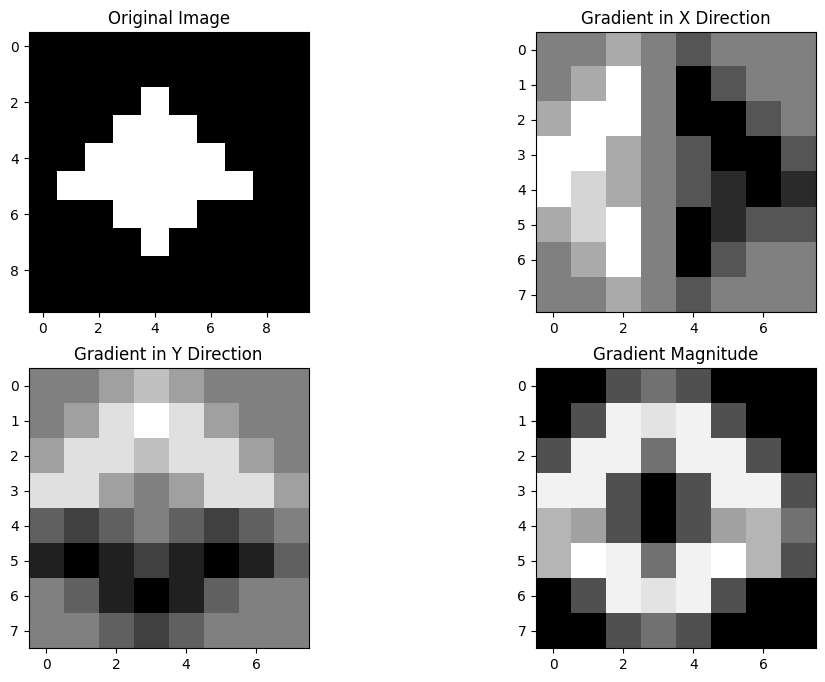

In [ ]:
# Display the original image, gradient in X direction, gradient in Y direction, and gradient magnitude
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(2, 2, 2)
plt.imshow(gradient_x, cmap='gray')
plt.title("Gradient in X Direction")

plt.subplot(2, 2, 3)
plt.imshow(gradient_y, cmap='gray')
plt.title("Gradient in Y Direction")

plt.subplot(2, 2, 4)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Gradient Magnitude")

plt.show()


## 2. Laplacian of Gaussian (LoG)
The Laplacian of Gaussian (LoG) is technique that combines the Gaussian smoothing and Laplacian operations to highlight edges. Here's a Python code block using OpenCV in a Google Colab notebook to demonstrate edge detection using the Laplacian of Gaussian (LoG)

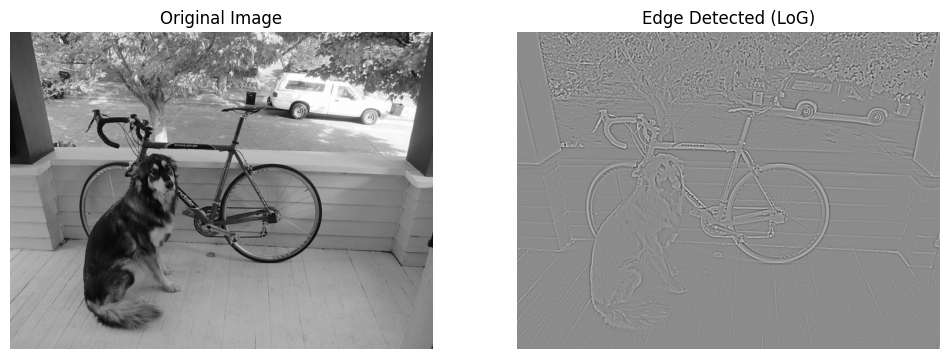

In [ ]:
# Step 1: Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load an image
image_url = "/dog_bike_car.jpg"  # Replace with the URL of your image
image = cv2.imread(image_url, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale

# Step 3: Apply Gaussian smoothing to the image
blurred = cv2.GaussianBlur(image, (5, 5), 0)  # Adjust the kernel size as needed

# Step 4: Apply the Laplacian operator to the smoothed image
laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

# Step 5: Normalize the Laplacian result
laplacian_normalized = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Step 6: Display the original image and the LoG edge-detected image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian_normalized, cmap='gray')
plt.title('Edge Detected (LoG)')
plt.axis('off')

plt.show()

## 3. Canny Edge Detector
Certainly! The Canny Edge Detector is another popular edge detection algorithm that can be used in computer vision. Here's a Python code block using OpenCV in a Google Colab notebook to demonstrate edge detection using the Canny Edge Detector:


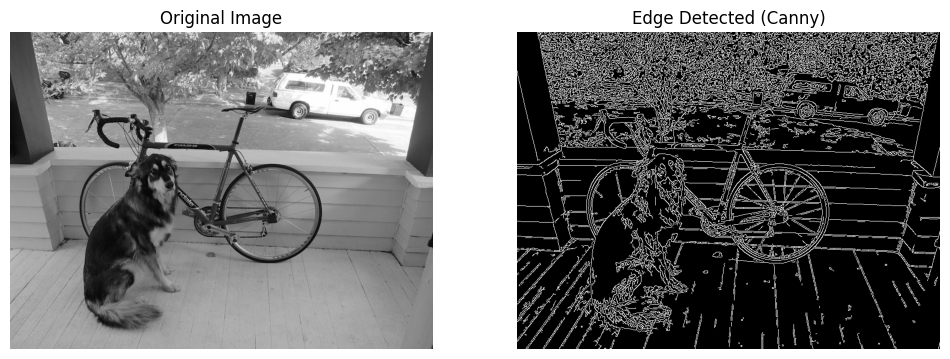

In [ ]:
# Step 1: Import necessary libraries
import cv2
import matplotlib.pyplot as plt

# Step 2: Load an image
image_url = "/dog_bike_car.jpg"  # Replace with the URL of your image
image = cv2.imread(image_url, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale

# Step 3: Apply the Canny Edge Detector
edges = cv2.Canny(image, threshold1=30, threshold2=100)  # Adjust thresholds as needed

# Step 4: Display the original image and the edge-detected image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detected (Canny)')
plt.axis('off')

plt.show()
